In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#load the dataset
file_path = '/content/drive/MyDrive/ELEVATE_LABS/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
#rows and columns
df.shape

(577, 11)

In [ ]:
#first 10 rows
df.head(10)#first 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
3,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2
4,6,0,3,"Moran, Mr. James",1,-0.104637,0,0,330877,-0.478116,1
5,7,0,1,"McCarthy, Mr. Timothy J",1,1.893459,0,0,17463,0.395814,2
6,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,-1.180535,1,0,237736,-0.042956,0
7,13,0,3,"Saundercock, Mr. William Henry",1,-0.719436,0,0,A/5. 2151,-0.486337,2
8,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,-1.180535,0,0,350406,-0.490280,2
9,18,1,2,"Williams, Mr. Charles Eugene",1,-0.104637,0,0,244373,-0.386671,2


In [ ]:
#info - datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    int64  
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 49.7+ KB


In [ ]:
#missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [ ]:
#encoding categorical columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) #female = 0, male = 1
df['Embarked'] = le.fit_transform(df['Embarked']) #C =0, Q = 1, S = 2

In [ ]:
#normalizing numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

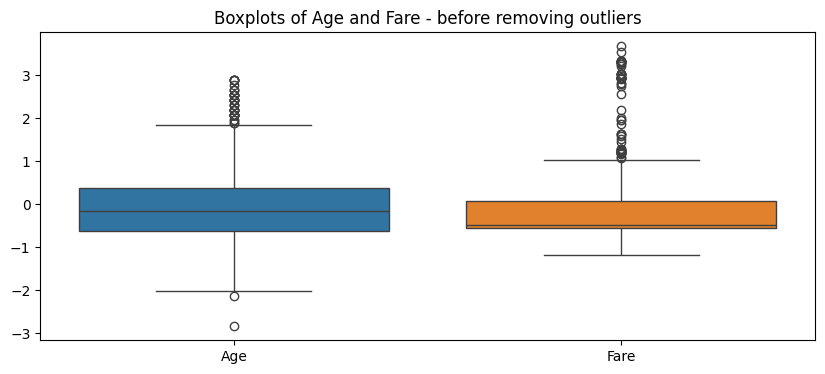

In [ ]:
#visualizing outliers using boxplots
plt.figure(figsize = (10, 4))
sns.boxplot(data = df[['Age', 'Fare']])
plt.title('Boxplots of Age and Fare - before removing outliers')
plt.show()

In [ ]:
#removing outliers using IQR
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    df = remove_outliers(col)
print("After outlier removal:", df.shape)

After outlier removal: (384, 11)


In [ ]:
#first 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,3,1,3,"Heikkinen, Miss. Laina",0,-0.386610,0,0,STON/O2. 3101282,-0.555858,2
3,5,0,3,"Allen, Mr. William Henry",1,0.666730,0,0,373450,-0.545934,2
4,6,0,3,"Moran, Mr. James",1,-0.152535,0,0,330877,-0.513517,1
7,13,0,3,"Saundercock, Mr. William Henry",1,-1.088837,0,0,A/5. 2151,-0.545934,2
8,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,-1.791063,0,0,350406,-0.561479,2
9,18,1,2,"Williams, Mr. Charles Eugene",1,-0.152535,0,0,244373,-0.152939,2
11,20,1,3,"Masselmani, Mrs. Fatima",0,-0.152535,0,0,2649,-0.611433,0
13,22,1,2,"Beesley, Mr. Lawrence",1,0.549692,0,0,248698,-0.152939,2
14,23,1,3,"McGowan, Miss. Anna ""Annie""",0,-1.674026,0,0,330923,-0.547585,1
16,27,0,3,"Emir, Mr. Farred Chehab",1,-0.152535,0,0,2631,-0.611433,0


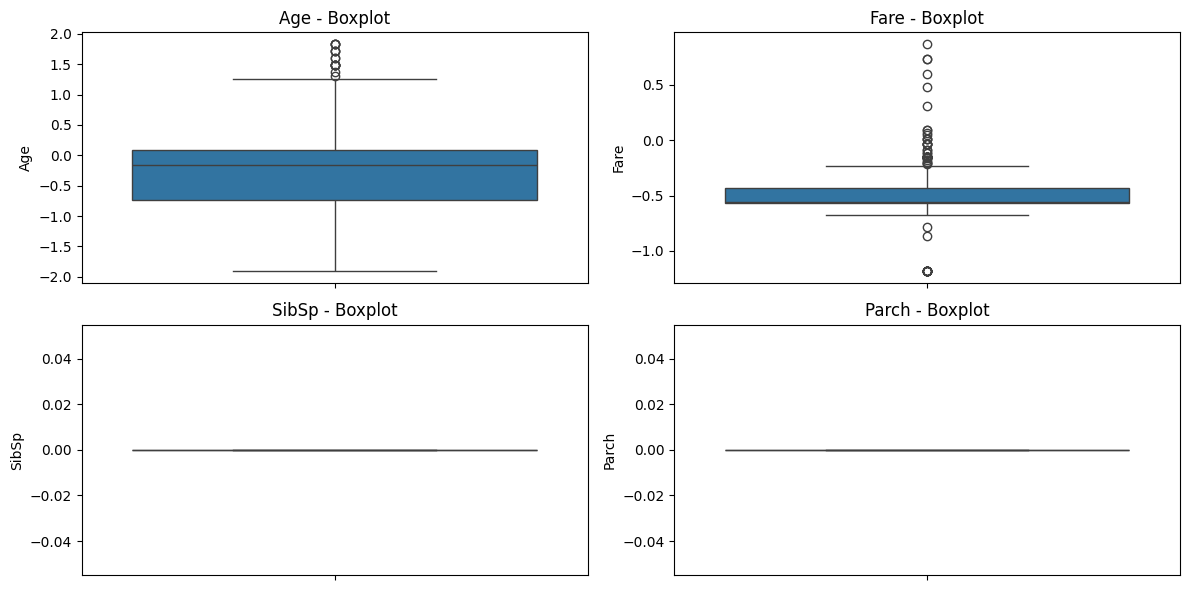

In [ ]:
#boxplot
plt.figure(figsize=(12, 6))
cols = ['Age', 'Fare', 'SibSp', 'Parch']
pos = 1

for col in cols:
    plt.subplot(2, 2, pos)
    sns.boxplot(y=df[col])
    plt.title(f"{col} - Boxplot")
    pos += 1

plt.tight_layout()
plt.show()